# Breast Cancer Classification Using SVM

### Importing Libraries And Data Sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data_set = load_breast_cancer()

In [4]:
data_set.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(data_set['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
print(data_set['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
print(data_set['target_names'])

['malignant' 'benign']


In [8]:
print(data_set['data'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [9]:
data_set['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
df_cancer = pd.DataFrame(np.c_[data_set['data'], data_set['target']],
                        columns = np.append(data_set['feature_names'], ['target']))

In [11]:
df_cancer

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890     0.0  
1                  0.1860          0.2750                  0.08902     0.0  
2                  0.2430          0.3613                  0.08758     0.0  
3                  0.2575          0.6638                  0.17300     0.0  
4                  0.1625          0.2364                  0.076

### Visualizing DataSets

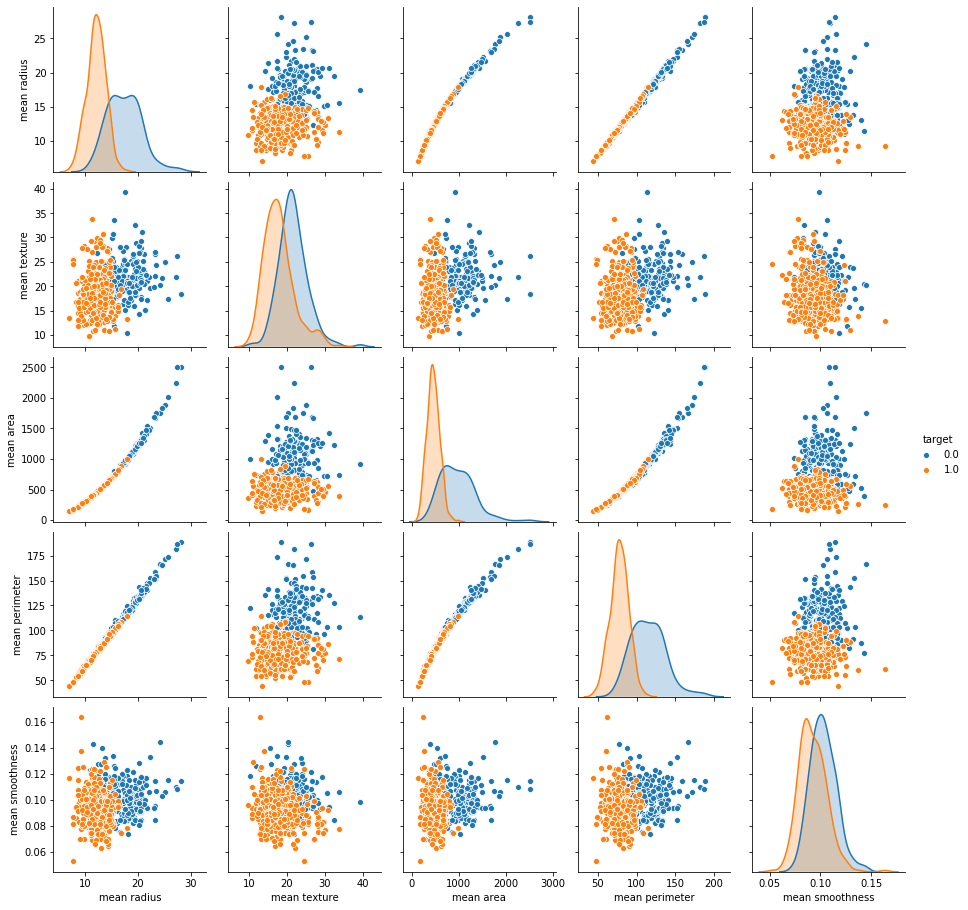

In [12]:
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

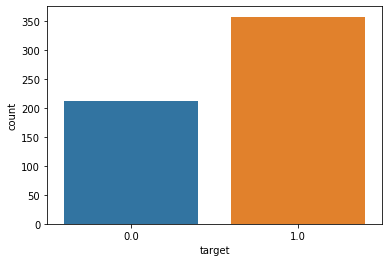

In [13]:
sns.countplot(df_cancer['target'])

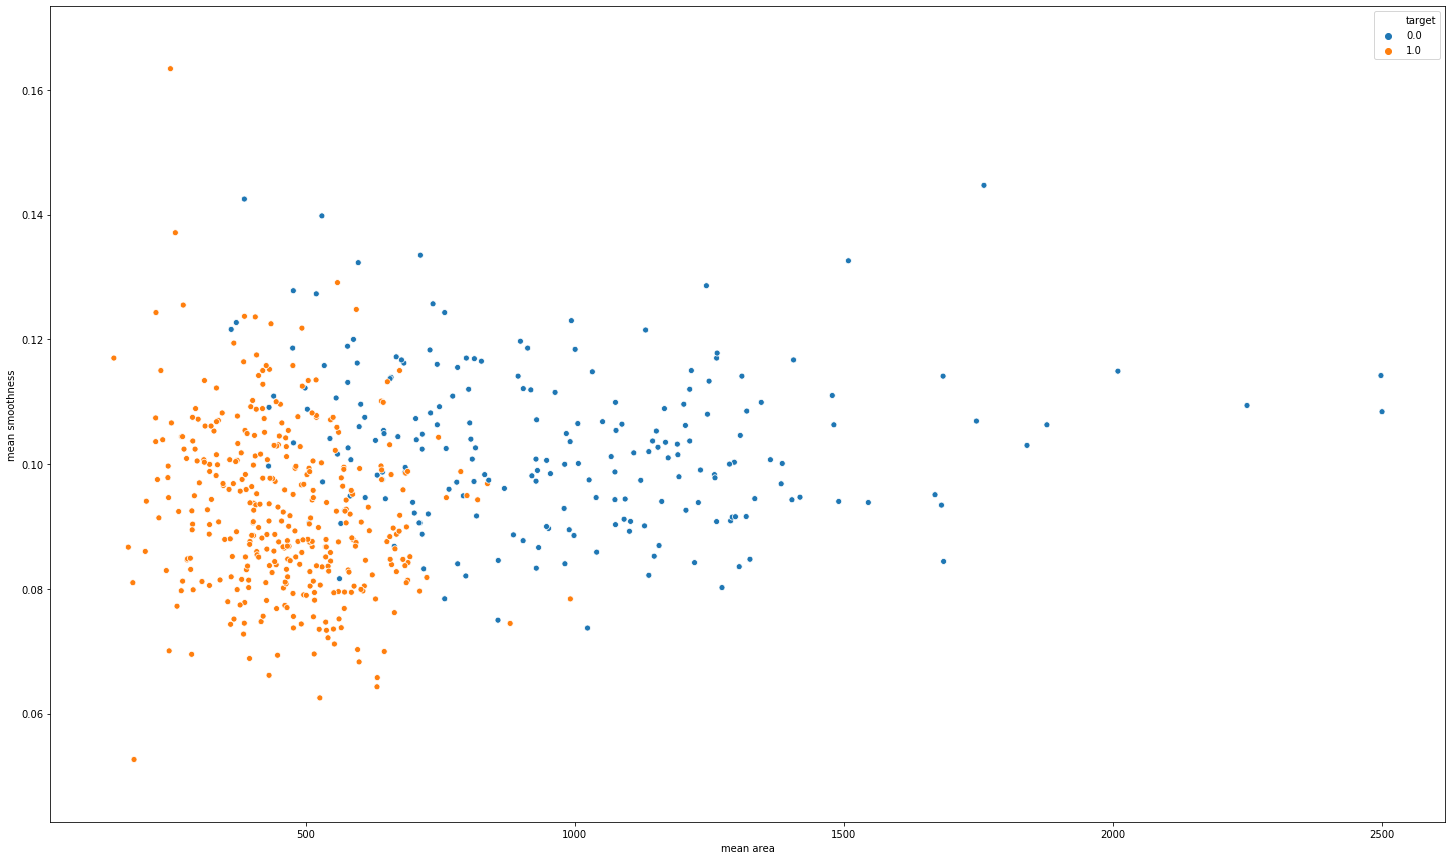

In [14]:
plt.figure(figsize = (25, 15))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df_cancer)

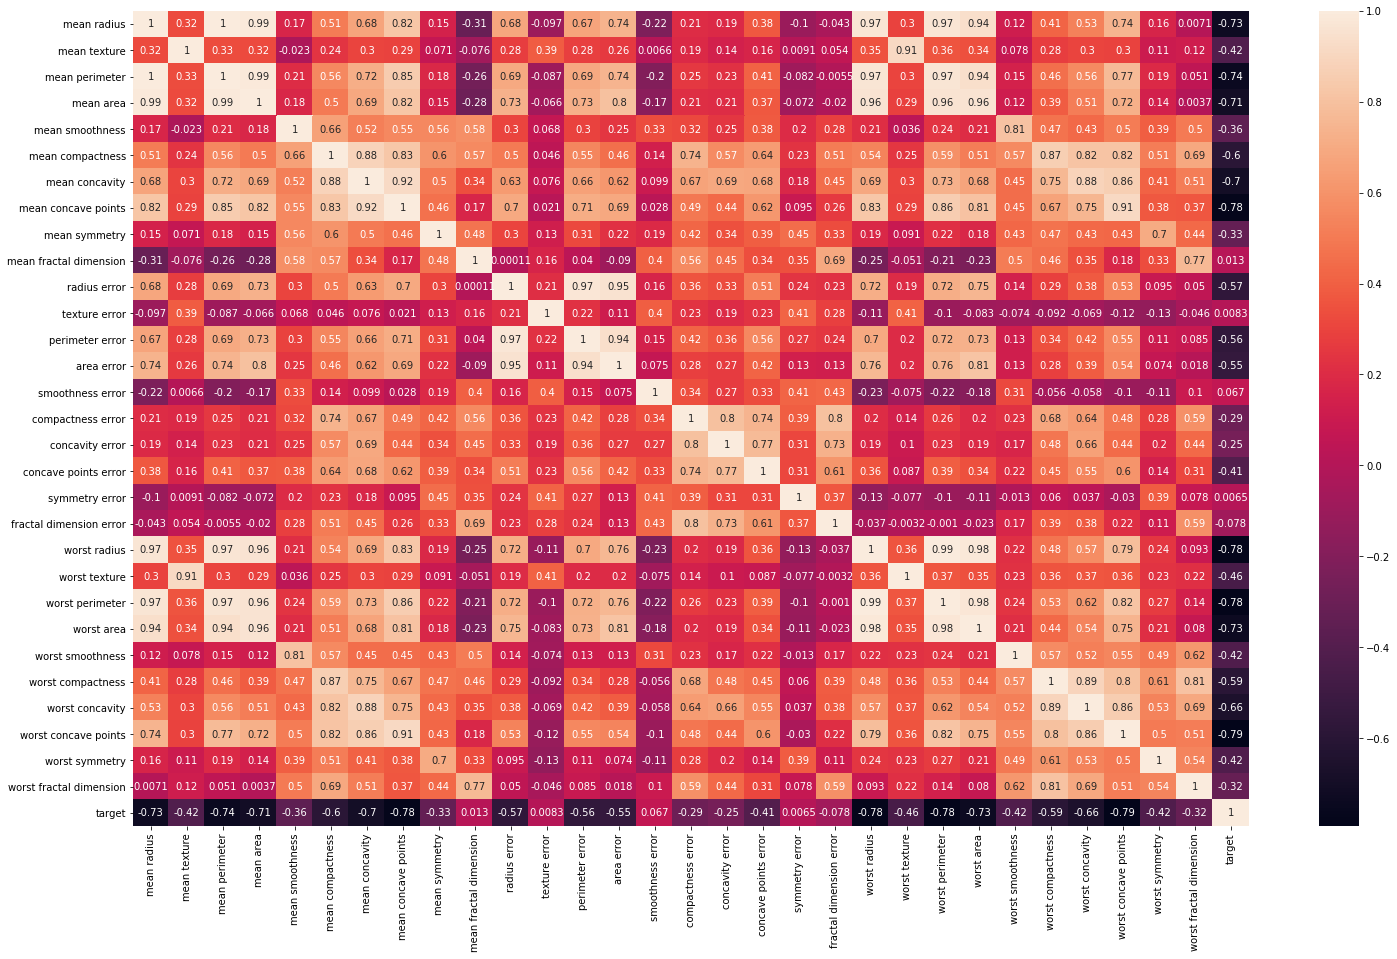

In [15]:
plt.figure(figsize = (25, 15))
sns.heatmap(df_cancer.corr(), annot = True)

### Splitting DataSet Into Training And Testing Sets

In [16]:
X, y = load_breast_cancer(return_X_y = True)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
print(X_train, X_test, y_train, y_test)

[[1.146e+01 1.816e+01 7.359e+01 ... 5.509e-02 2.208e-01 7.638e-02]
 [1.108e+01 1.883e+01 7.330e+01 ... 2.524e-01 4.154e-01 1.403e-01]
 [1.377e+01 2.229e+01 9.063e+01 ... 1.673e-01 3.080e-01 9.333e-02]
 ...
 [1.106e+01 1.496e+01 7.149e+01 ... 1.075e-01 3.301e-01 9.080e-02]
 [1.113e+01 1.662e+01 7.047e+01 ... 4.044e-02 2.383e-01 7.083e-02]
 [1.462e+01 2.402e+01 9.457e+01 ... 6.946e-02 2.522e-01 7.246e-02]] [[1.422e+01 2.312e+01 9.437e+01 ... 1.772e-01 5.166e-01 1.446e-01]
 [1.243e+01 1.700e+01 7.860e+01 ... 2.832e-02 1.901e-01 5.932e-02]
 [1.051e+01 2.019e+01 6.864e+01 ... 6.136e-02 2.383e-01 9.026e-02]
 ...
 [1.287e+01 1.621e+01 8.238e+01 ... 5.780e-02 3.604e-01 7.062e-02]
 [1.808e+01 2.184e+01 1.174e+02 ... 9.181e-02 2.369e-01 6.558e-02]
 [1.193e+01 2.153e+01 7.653e+01 ... 7.247e-02 2.438e-01 8.541e-02]] [1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0
 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1

### Training Model

In [19]:
from sklearn.svm import SVC

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
for i, j in zip(y_test, y_pred):
    print(i, j)

0 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 0
0 0
0 0
1 1
1 1
1 1
0 0
1 1
0 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
0 1
0 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
1 1
1 1
0 1
1 1
0 0
1 1
1 1
0 0
0 1
0 0
0 0
1 1
1 1
1 1
0 0
0 1
0 0
0 0
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
0 1
1 1
1 1
0 0
0 0
1 1
1 1
0 0
1 1
1 1
1 1
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
0 0
0 0
0 0
1 1
1 1
1 1
0 0
1 1


In [24]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[44 11]
 [ 0 88]]


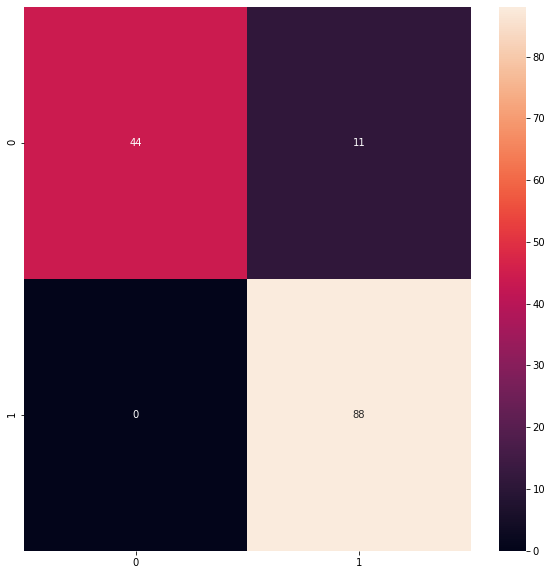

In [35]:
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [28]:
print("ACCURACY: %s", ((44 + 88) / (44 + 88 + 11)) * 100)

ACCURACY: %s 92.3076923076923


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        55
           1       0.89      1.00      0.94        88

    accuracy                           0.92       143
   macro avg       0.94      0.90      0.92       143
weighted avg       0.93      0.92      0.92       143



### Improving Model

In [37]:
param_grid = { "C" : [0.1, 1, 10, 100],
             'gamma' : [1, 0.1, 0.01, 0.001],
             'kernel' : ['rbf']}

In [38]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 4)

In [39]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.628, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.628, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.635, total=   0.0s
[CV] C

[CV] .......... C=100, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.628, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [40]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [41]:
y_pred_improved = grid.predict(X_test)

In [42]:
cm_improved = confusion_matrix(y_test, y_pred_improved)

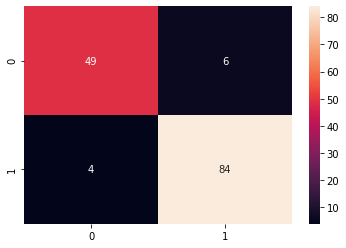

In [44]:
sns.heatmap(cm_improved, annot = True)

In [45]:
print(classification_report(y_test, y_pred_improved))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        55
           1       0.93      0.95      0.94        88

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143



# END